https://scikit-image.org/docs/dev/user_guide.html

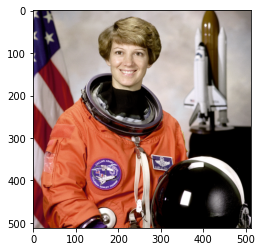

In [124]:
import skimage
from skimage import data
from skimage import filters
import numpy as np
import matplotlib.pyplot as plt

image = data.astronaut()
plt.imshow(image)

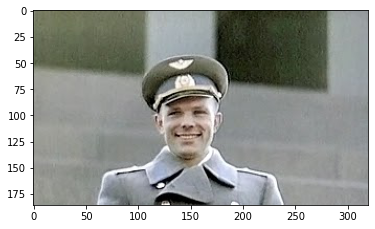

In [125]:
 # вызываем модуль io и указываем имя файла нашего изображения, загружаем изображение
img = skimage.io.imread('yuri.jpg')
plt.imshow(img) # отрисовываем изображение во внутренний буфер pyplot
plt.show()          # выводим результат на экран

In [126]:
print(skimage.data.chelsea().shape)
print(skimage.data.coins().shape)

(300, 451, 3)
(303, 384)


In [127]:
img = skimage.data.coins()
print(img[30, 50])

110


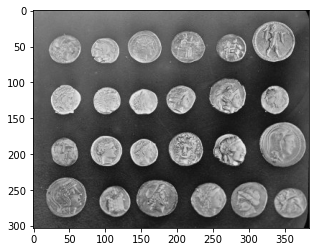

In [128]:
plt.imshow(skimage.data.coins())
plt.show()

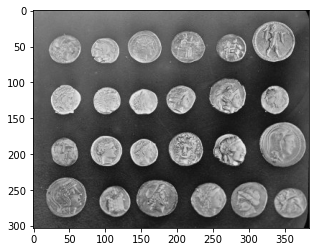

In [129]:
plt.imshow(skimage.data.coins(), cmap='gray') # задаем цветовую карту ч/б
plt.show()

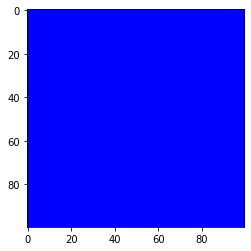

In [130]:
width, height = 100, 100
plt.imshow(np.array([[[0, 0, 255] for _ in range(width)] for __ in range(height)]))
plt.show()

In [131]:
np.array([[[0, 0, 255] for _ in range(width)] for __ in range(height)]).shape

(100, 100, 3)

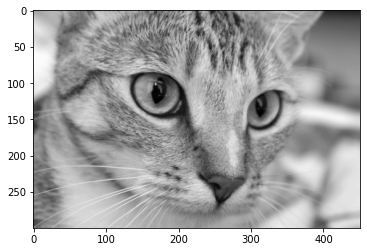

In [132]:
img = skimage.data.chelsea() # загружаем изображение из встроенной библиотеки 
img = skimage.color.rgb2gray(img) # вызываем функцию color.rgb2gray
plt.imshow(img, cmap='gray')
plt.show()

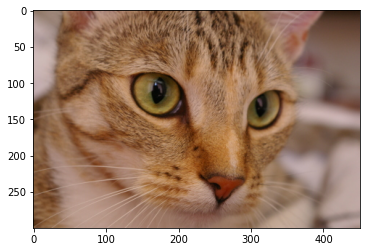

In [133]:
plt.imshow(skimage.data.chelsea(), cmap='gray')
plt.show()

In [134]:
# skimage.io.imsave()

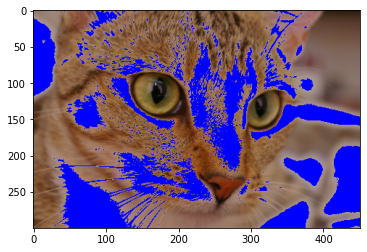

In [135]:
img = skimage.data.chelsea()
# img[:,:,0] > 170 отфильтрует те пиксели изображения, 0-й канал которых 
# (то есть R — red, красный) имеет интенсивность больше 170
img[img[:, :, 0] > 170] = (0, 0, 255)
plt.imshow(img)
plt.show()

Примерно таким же образом работает технология Chroma key: вы фотографируетесь или записываете видео на фоне одноцветного полотна, а потом заменяете все пиксели этого цвета на пиксели другого изображения:

In [136]:
def chroma_key(img, key, background):
    img[img == key] = background
    return img

инвертировать цвета — получить «негатив» изображения. Для этого в каждый из цветовых каналов положим значения, равные 255 - x, где x — это то значение, которое там было до изменения:

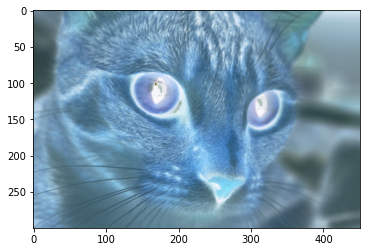

In [137]:
img = skimage.data.chelsea()
img = -img + 255
plt.imshow(img)
plt.show()

In [138]:
# img = skimage.data.chelsea()
# img = skimage.color.rgb2gray(img)
# flt = skimage.filters.prewitt(img) # AttributeError: module 'skimage' has no attribute 'filters'
# plt.show()

 оператор Прюита (https://en.wikipedia.org/wiki/Prewitt_operator) — фильтр для выделения границ в изображении. Он устроен следующим образом: определяет те пиксели, которые значительно отличаются от соседних и подсвечивает их. Таким образом, становятся видны границы объектов:



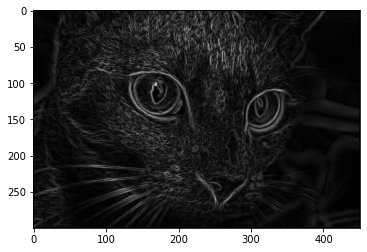

In [139]:
# prewitt_h/prewitt_v они выделяют отдельно вертикальные и горизонтальные границы
img = skimage.data.chelsea()
img = skimage.color.rgb2gray(img)
flt = filters.prewitt(img)
plt.imshow(flt, cmap='gray')
plt.show()

Взять какую-то часть изображения очень просто: нужно лишь взять подмассив

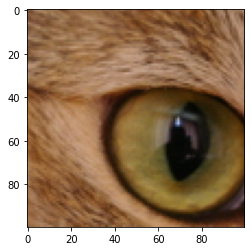

In [140]:
img = skimage.data.chelsea()
img = img[50:150, 100:200]
plt.imshow(img)
plt.show()

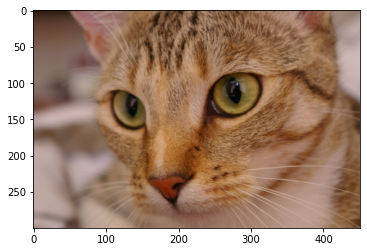

In [141]:
# Отображение изображений по оси X
img = skimage.data.chelsea()
img = img[:, ::-1, :]    # первую ось не трогаем, а по второй идём с шагом -1
plt.imshow(img)
plt.show()

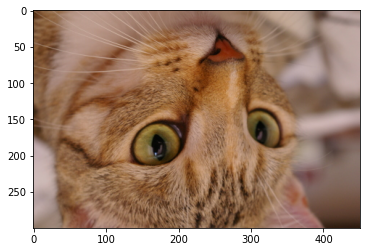

In [142]:
img = skimage.data.chelsea()
img = img[::-1, :, :] 
plt.imshow(img)
plt.show()

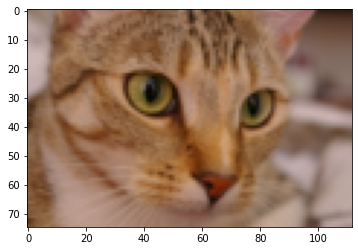

In [143]:
# изменить размеры картинки с помощью skimage.transform.resize:

img = skimage.data.chelsea()
# уменьшаем картинку в 4 раза
img = skimage.transform.resize(img, (img.shape[0] // 4, img.shape[1] // 4))
plt.imshow(img)
plt.show()

## Задание 1

Запуск любых классификаторов обычно занимает время. Поэтому перед тем, как запустить основной классификатор, обычно производится “выбор кандидатов” – с помощью простых эвристик выбираются те регионы на картинке, которые обладают каким-то набором свойств. Давайте попробуем это реализовать.

Построим классификатор, который найдет наиболее “шумные” участки на картинке – то есть те, у которых среднеквадратичное отклонение максимально. Для вычисления среднеквадратичного отклонения воспользуйтесь функцией numpy.var()

Входные данные: Даны изображение image в виде numpy-массива (это цветное изображение в RGB-формате), а также число n - размер квадрата, который нужно найти.

Результат: напишите функцию max_variance_square(image, n), возвращающую максимальное среднеквадратическое отклонение среди всех квадратов размера n*n на картинке image.

Sample input: max_variance_square(skimage.data.chelsea(), 10)

Sample output: 3652.446788888889

In [144]:
def max_variance_square(image, n):
    n = 10
    res_var = 0
    for i in range(img.shape[0]-n):
        for j in range(img.shape[1]-n):
            sq = img[i:i+n, j:j+n]
            sq_var = sq.var()
            if sq_var > res_var:
                res_var = sq_var
    return res_var


print(max_variance_square(skimage.data.chelsea(), 10))

0.04862745959237704


https://scikit-image.org/docs/dev/auto_examples/applications/plot_face_detection.html#sphx-glr-auto-examples-applications-plot-face-detection-py

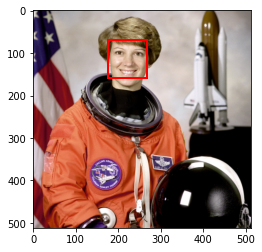

In [145]:
from skimage import data
from skimage.feature import Cascade

import matplotlib.pyplot as plt
from matplotlib import patches

# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

img = data.astronaut()

detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()

In [146]:
detected

[{'c': 177, 'height': 90, 'r': 69, 'width': 90}]

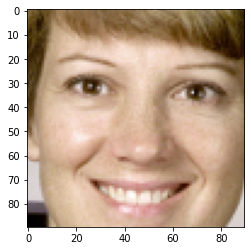

In [147]:
plt.imshow(skimage.data.astronaut()[69:69+90, 177:177+90])
plt.show()

In [148]:
# Входные данные: RGB-картинка image в виде numpy-массива.
# Результат: реализуйте функцию count_faces(image), 
# возвращающую единственное целое число - количество лиц на картинке.
# Sample input: count_faces(skimage.data.astronaut())
# Sample output: 1

In [149]:
from skimage import data
from skimage.feature import Cascade

def count_faces(image):
    # Load the trained file from the module root.
    trained_file = data.lbp_frontal_face_cascade_filename()
    # Initialize the detector cascade.
    detector = Cascade(trained_file)
    detected = detector.detect_multi_scale(img=image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123)
                                       )
    return len(detected)
    


print(count_faces(skimage.data.astronaut()))

1


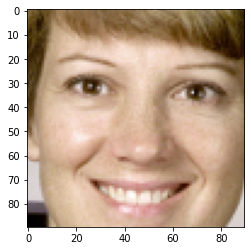

In [152]:
from skimage import data
from skimage.feature import Cascade


def extract_face(image):
    # Load the trained file from the module root.
    trained_file = data.lbp_frontal_face_cascade_filename()
    # Initialize the detector cascade.
    detector = Cascade(trained_file)
    detected = detector.detect_multi_scale(img=image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123)
                                       )
    r, c = detected[0]['r'], detected[0]['c']
    width, height = detected[0]['width'], detected[0]['height']
    res = image[r:r+width, c:c+height]

    return res


res = extract_face(skimage.data.astronaut())
plt.imshow(res)
plt.show()

Входные данные: RGB-картинка image в виде numpy-массива, RGB-картинка patch, которую надо наложить на найденные лица.

Результат: реализуйте функцию patch_faces(image, patch), RGB-картинку image (numpy-массив), в которой во всех местах, где были лица, теперь располагается картинка patch, отмасштабированная соответствующим образом. Для масштабирования картинки patch используйте функцию
skimage.transform.resize:

p = (skimage.transform.resize(patch, (height, width)) * 255).astype(int)

Убедитесь, что ваш код работает на картинках с несколькими лицами.

Sample input: patch_faces(skimage.data.astronaut(), skimage.io.imread(‘smile.jpg’))

Sample output: RGB-картинка с астронавтом, на месте лица - смайлик.

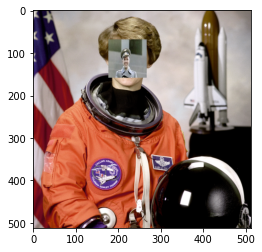

In [158]:
from skimage import data
from skimage.feature import Cascade


def patch_faces(image, patch):
    # Load the trained file from the module root.
    trained_file = data.lbp_frontal_face_cascade_filename()
    # Initialize the detector cascade.
    detector = Cascade(trained_file)
    detected = detector.detect_multi_scale(img=image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123)
                                       )
    for face in detected: 
        r, c = face['r'], face['c']
        width, height = face['width'], face['height']

        p = (skimage.transform.resize(patch, (height, width)) * 255).astype(int)

        image[r:r+width, c:c+height] = p

    return image


# res = patch_faces(skimage.data.astronaut(), skimage.io.imread('smile.jpg'))
res = patch_faces(skimage.data.astronaut(), skimage.io.imread('yuri.jpg'))

plt.imshow(res)
plt.show()